> _Exercise_: $K$-means
> 
> * Visualize the prostitution data (e.g. by plotting it on a map)

In [20]:
location_data = []
with open('/Users/olegpolakow/Documents/crime_data/SFPD_Incidents_-_from_1_January_2003.csv', 'rb') as f:
    reader = csv.DictReader(f, delimiter=',') # access data like a dict with column names as keys
    location_data = [
        eval(row['Location']) 
        for row in reader 
        if row['Category']=='PROSTITUTION' 
        and isinstance(eval(row['X']), float) 
        and isinstance(eval(row['Y']), float)
    ]
len(location_data)

16168

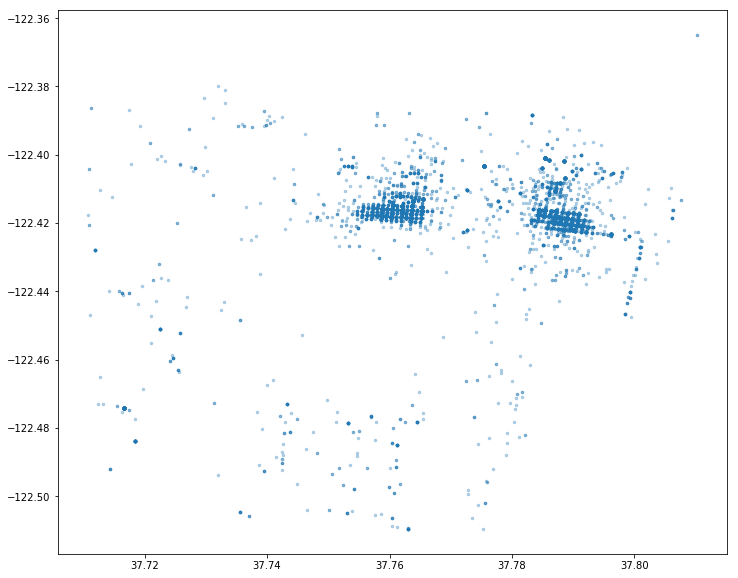

In [21]:
import matplotlib.pyplot as plt
plt.close('all')
fig = plt.figure(figsize=(12, 10))
plt.plot(zip(*location_data)[0], zip(*location_data)[1], '.', markersize=5, alpha=.3)
plt.show()

> * Train models of $K = 2,\ldots,10$ on the prostitution data.

In [22]:
from sklearn.cluster import KMeans

ks = range(2, 11)
kmeans = {k: KMeans(n_clusters=k, max_iter=5).fit(location_data) for k in ks}

In [23]:
def plot_kmeans_poly(k): # Taken from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
    plt.close('all')
    fig = plt.figure(figsize=(12, 10))
    
    kmean = kmeans[k]
    X = np.array(location_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X[:, 0].min() - .01, X[:, 0].max() + .01
    y_min, y_max = X[:, 1].min() - .01, X[:, 1].max() + .01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmean.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=5, alpha=.3)
    # Plot the centroids as a white X
    centroids = kmean.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

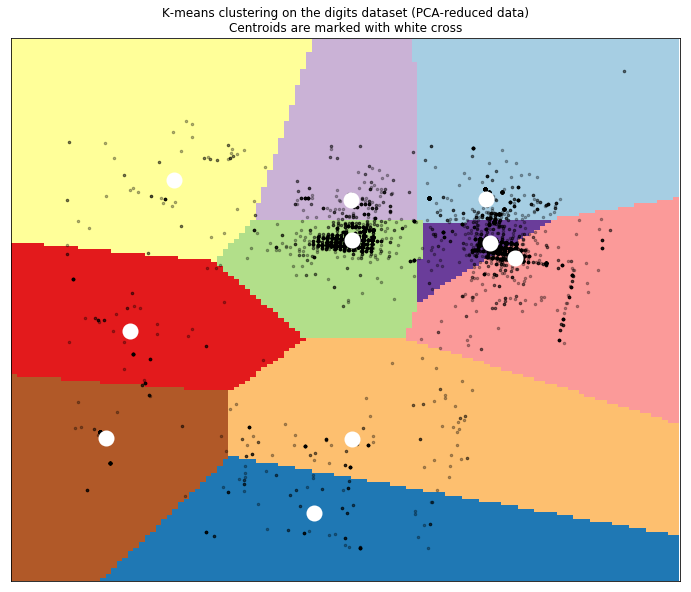

In [24]:
plot_kmeans_poly(10)

> * Explore how the total squared error changes as a function of $K$ and identify what you think is the right number of clusers based on the knee-point in the squared error plot.

In [25]:
from scipy.spatial import distance

def squared_clustering_errors(X, k):
    centroids = kmeans[k].cluster_centers_
    assignments = kmeans[k].predict(X)
    return sum(distance.euclidean(data_point, centroids[assignments[i]]) for i, data_point in enumerate(X))

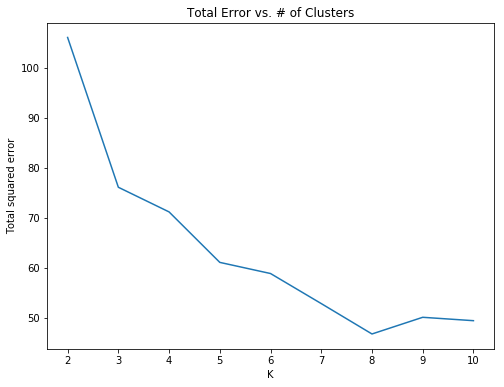

In [26]:
errors = [squared_clustering_errors(location_data, k) for k in ks]

plt.close('all')
fig = plt.figure(figsize=(8, 6))
plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("K")
plt.ylabel("Total squared error")
plt.title("Total Error vs. # of Clusters")
plt.show()

The idea of the elbow method is to choose the k at which the SSE decreases abruptly. The "elbow effect" in the graph is at $K=3$, which is an indicator that 3 is the "right" amount of centroids.

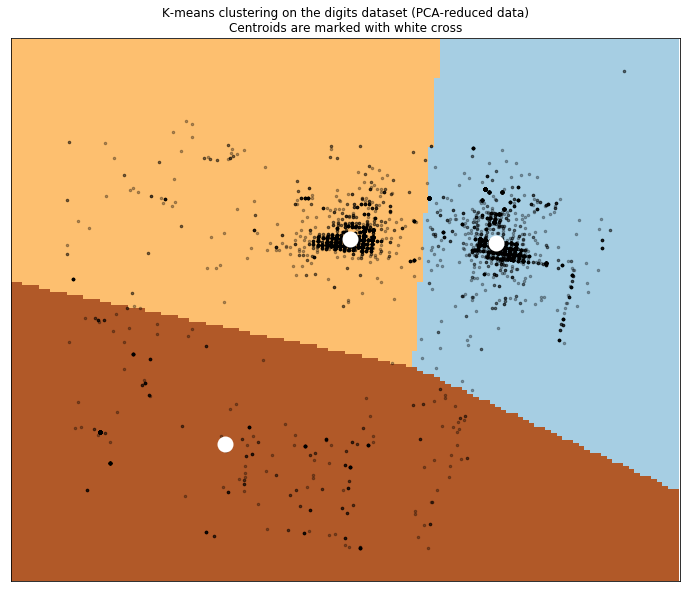

In [27]:
plot_kmeans_poly(3)

> * And by the way: The fit only gets better when we add more means - why not keep adding more of them: Explain in your own words why it makes sense to stop around a knee-point.